In [78]:
import pandas as pd 
import warnings as wr 
wr.filterwarnings('ignore') 

In [79]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [81]:
df.Gender = le.fit_transform(df[['Gender']])

In [82]:
df.head() 

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [83]:
df.tail()

,Gender,Height,Weight
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405
8554,0,60.921791,131.253738


# Go Ahead

In [192]:
#import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# EDA

In [87]:
df.shape

(8555, 3)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   int64  
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 200.6 KB


In [114]:
df.columns.tolist()

['Gender', 'Height', 'Weight']

In [116]:
 df.dtypes

Gender      int64
Height    float64
Weight    float64
dtype: object

In [118]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [124]:
df['Gender'].value_counts()

Gender
1    5000
0    3555
Name: count, dtype: int64

In [126]:
df.describe()

,Gender,Height,Weight
count,8555.000000,8555.000000,8555.000000
mean,0.584454,66.809925,165.632735
std,0.492845,3.851454,32.043922
min,0.000000,54.616858,65.780000
25%,0.000000,63.957684,139.876803
50%,1.000000,66.985923,168.521567
75%,1.000000,69.604427,190.666305
max,1.000000,80.450000,269.989698


In [90]:
#group by gender
grouped = df.groupby("Gender").mean()
grouped

,Height,Weight
Gender,,
0,63.692596,135.604715
1,69.026346,186.982658


In [91]:
# descriptive gender
desc = df.groupby("Gender").describe()
desc

Height                                                        \
         count       mean       std        min        25%        50%   
Gender                                                                 
0       3555.0  63.692596  2.745657  54.616858  61.839471  63.690720   
1       5000.0  69.026346  2.863362  58.406905  67.174679  69.027709   

                              Weight                                   \
              75%        max   count        mean        std       min   
Gender                                                                  
0       65.510164  80.450000  3555.0  135.604715  19.240727  68.98253   
1       70.988744  78.998742  5000.0  186.982658  19.917171  65.78000   

                                                        
               25%         50%         75%         max  
Gender                                                  
0       122.524410  135.697284  148.689376  196.107116  
1       173.884062  187.033546  200.357802  269.989698

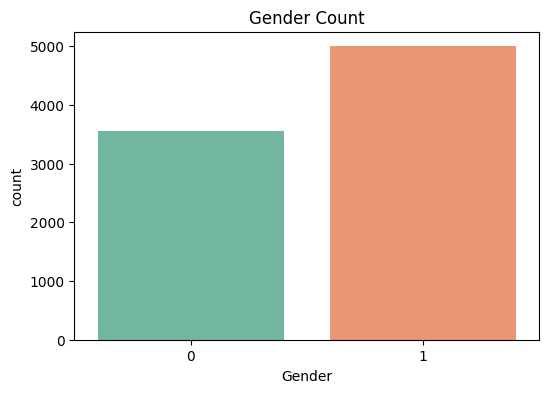

In [146]:
#Gender Count Plot
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=df, palette="Set2")
plt.title("Gender Count")
plt.show()

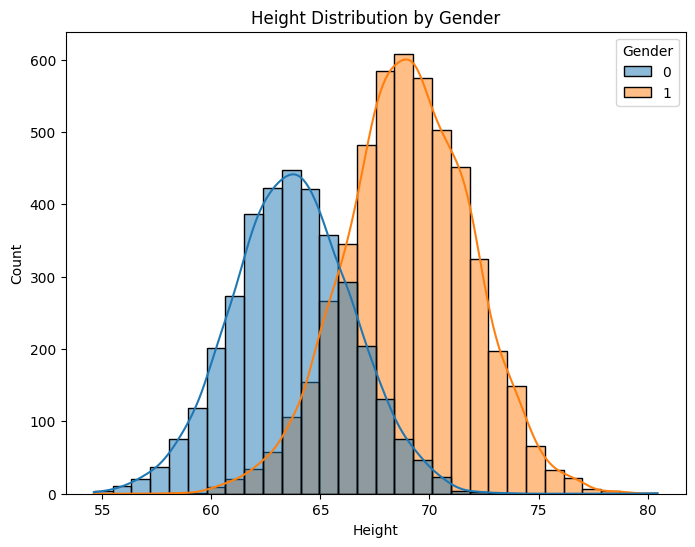

In [148]:
#Height Distribution by Gender
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="Height", hue="Gender", kde=True, bins=30)
plt.title("Height Distribution by Gender")
plt.show()

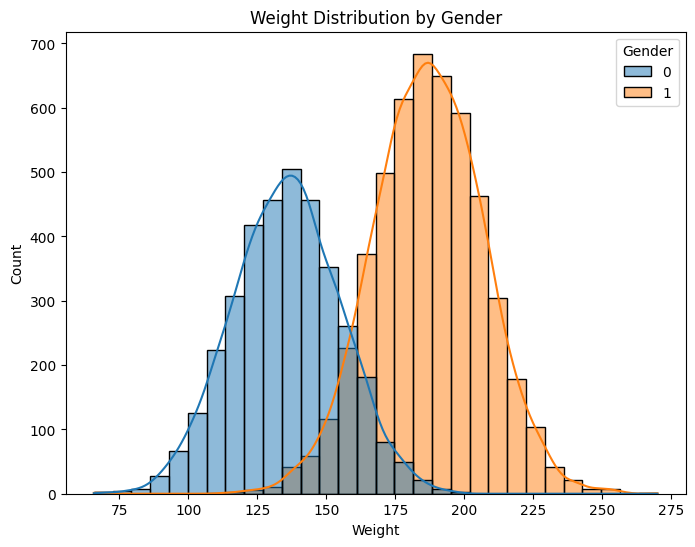

In [150]:
#Weight Distribution by Gender
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="Weight", hue="Gender", kde=True, bins=30)
plt.title("Weight Distribution by Gender")
plt.show()

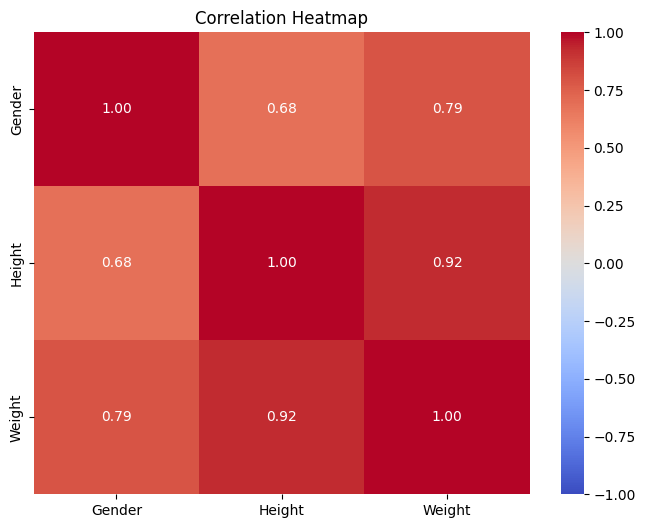

In [152]:
#Correlation Heatmap
plt.figure(figsize=(8,6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

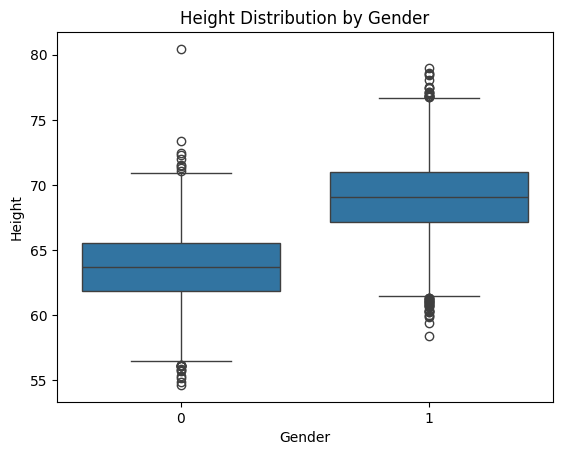

In [92]:
#Boxplot of Height by Gender
sns.boxplot(x="Gender", y="Height", data=df)
plt.title("Height Distribution by Gender")
plt.show()

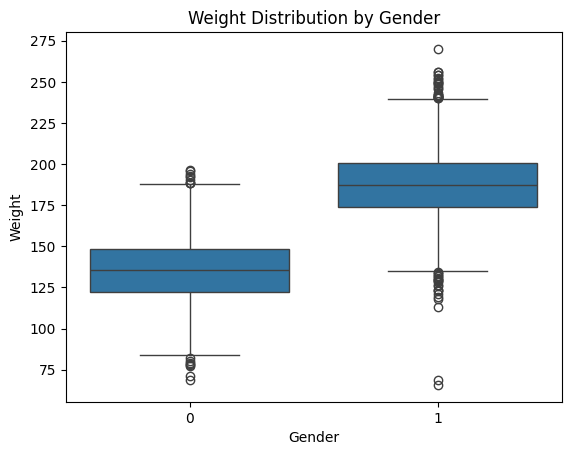

In [93]:
#Boxplot of Weight by Gender
sns.boxplot(x="Gender", y="Weight", data=df)
plt.title("Weight Distribution by Gender")
plt.show()

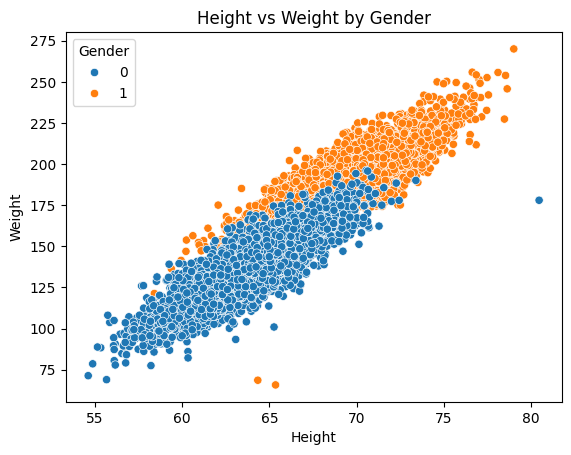

In [94]:
#Scatter plot (Height vs Weight) with Gender color
sns.scatterplot(x="Height", y="Weight", hue="Gender", data=df, alpha=1)
plt.title("Height vs Weight by Gender")
plt.show()

# Least Squared Linear Regression

In [164]:
#Feature (X) and Target (y)
X = df[['Height']] 
y = df['Weight']     

#Train-Test split (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Fit Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

#Coefficients
print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_[0])

#Prediction
y_pred = model.predict(X_test)

#Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("\nEvaluation Metrics:")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

Intercept (b0): -345.50397373679397
Slope (b1): 7.6500002569285535

Evaluation Metrics:
MSE  : 144.5071
RMSE : 12.0211
R²   : 0.8596


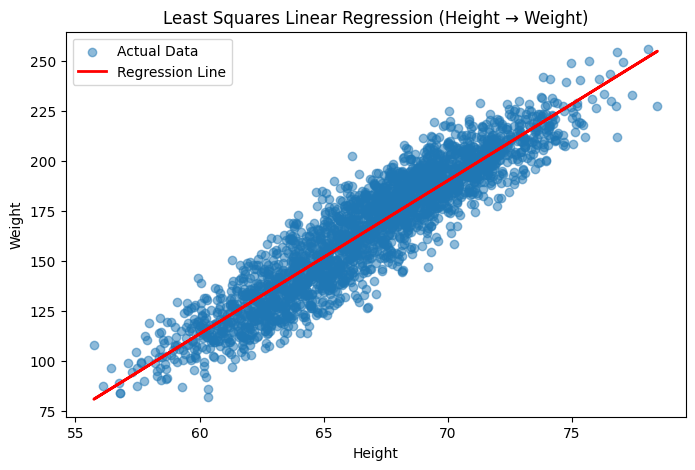

In [170]:
#Plot Regression Line
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, alpha=0.5, label="Actual Data")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Least Squares Linear Regression (Height → Weight)")
plt.legend()
plt.show()

# Regression Problem

In [242]:
#Evaluate the Model
def regression_metrics(y_true, y_pred, dataset_name="Test"):
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_true, y_pred)
    print(f"\n{dataset_name} Set Metrics:")
    print(f" MSE : {mse:.4f}")
    print(f" RMSE: {rmse:.4f}")
    print(f" R²  : {r2:.4f}")

regression_metrics(y_train, y_pred_train, "Train")
regression_metrics(y_test, y_pred_test, "Test")


Train Set Metrics:
 MSE : 155.3328
 RMSE: 12.4633
 R²  : 0.8485

Test Set Metrics:
 MSE : 144.5071
 RMSE: 12.0211
 R²  : 0.8596


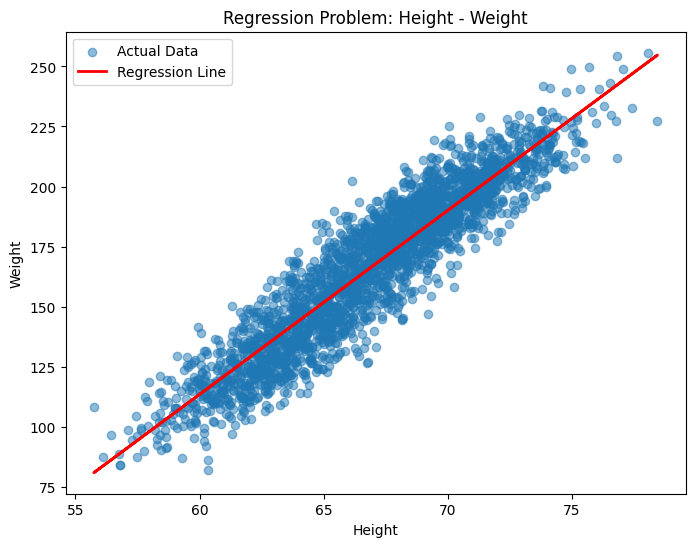

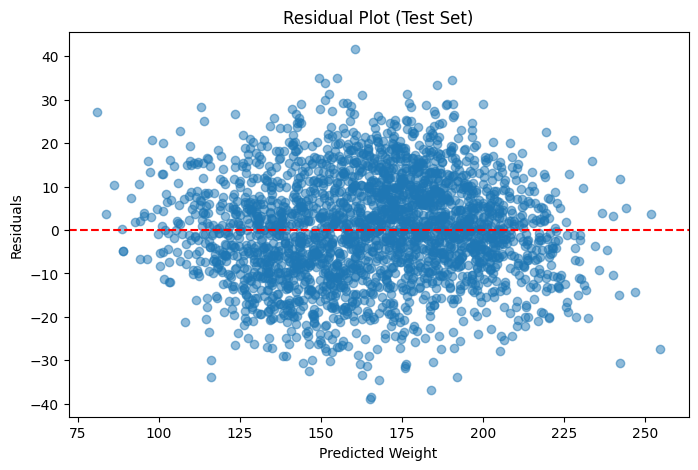

In [244]:
#Visualization Regression Line
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, alpha=0.5, label="Actual Data")
plt.plot(X_test, y_pred_test, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Regression Problem: Height - Weight")
plt.legend()
plt.show()

#Residual Plot
residuals = y_test - y_pred_test
plt.figure(figsize=(8,5))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Weight")
plt.ylabel("Residuals")
plt.title("Residual Plot (Test Set)")
plt.show()

# Classification Problem

In [247]:
#Separate Features (X) and Target (y)
X = df[['Height', 'Weight']]  
y = df['Gender']

#Train-Test Split (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

#Apply KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Predictions
y_pred = knn.predict(X_test)

#Evaluate the Model (Accuracy Only)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nKNN Classifier Accuracy: {accuracy:.4f}")


KNN Classifier Accuracy: 0.9131


# Comparison of Linear Rgeression and KNN Regressor

In [250]:
#plot

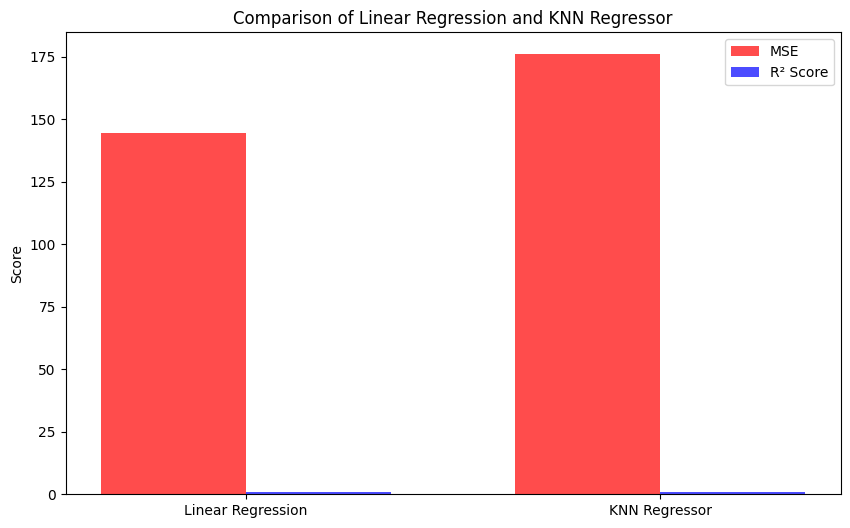

In [255]:
#Comparison Bar Chart
models = ["Linear Regression", "KNN Regressor"]
mse_scores = [mse_lr, mse_knn]
r2_scores = [r2_lr, r2_knn]
x = np.arange(len(models))
width = 0.35
plt.figure(figsize=(10,6))

# MSE Bar
plt.bar(x - width/2, mse_scores, width, label="MSE", color="red", alpha=0.7)

# R² Bar
plt.bar(x + width/2, r2_scores, width, label="R² Score", color="blue", alpha=0.7)
plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Comparison of Linear Regression and KNN Regressor")
plt.legend()
plt.show()

# Comparison of Logistic Rgeression and KNN Classifier

Logistic Regression Accuracy: 0.9185820023373588
KNN Classifier Accuracy: 0.9131281651733542


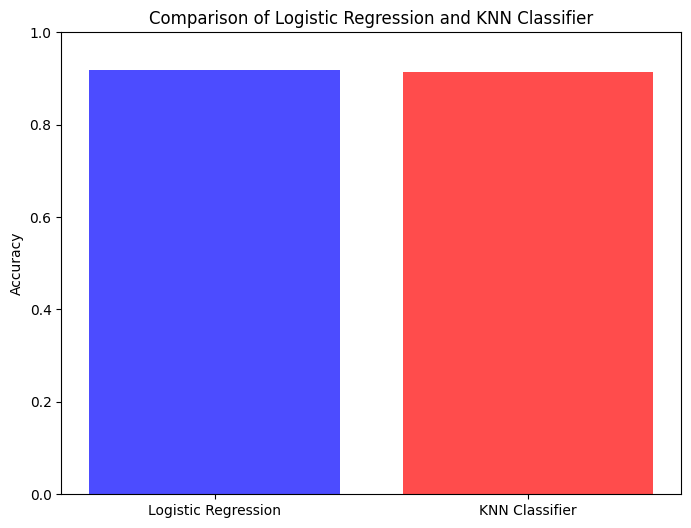

In [259]:
# Features & Target
X = df[['Height', 'Weight']]
y = df['Gender']

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)

#KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)

print("Logistic Regression Accuracy:", acc_log)
print("KNN Classifier Accuracy:", acc_knn)


#omparison Bar Chart
models = ["Logistic Regression", "KNN Classifier"]
accuracies = [acc_log, acc_knn]

plt.figure(figsize=(8,6))
plt.bar(models, accuracies, color=["blue","red"], alpha=0.7)
plt.ylabel("Accuracy")
plt.title("Comparison of Logistic Regression and KNN Classifier")
plt.ylim(0,1)
plt.show()
